In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

imputedDataset = pd.read_stata("/Users/burke/Documents/research/bpCog/microsim/microsim/data/fullyImputedDataset.dta")
imputedDataset.head()

,index,WTINT2YR,a1c,age,antiHypertensive,bmi,diedBy2015,gender,hdl,ldl,monthsToDeath,monthsToDeath2,otherLipidLowering,selfReportMI,selfReportMIAge,selfReportStroke,selfReportStrokeAge,statin,timeInUS,tot_chol,trig,ucod,waist,weight,year,anyPhysicalActivity,meanSBP,meanDBP,alcoholPerWeek,raceEthnicity,smokingStatus,education
0,0,102641.406474,5.1,22.0,0.0,23.3,5.397605e-79,1.0,41.0,110.0,61.0,61.0,0.0,0,NaN,0,NaN,0.0,NaN,168.0,84.0,0,81.0,69.2,2011,0,110.666667,74.666667,0.0,3,0,3
1,1,127351.373299,4.9,44.0,0.0,23.2,5.397605e-79,2.0,28.0,151.0,41.0,40.0,0.0,0,NaN,0,NaN,0.0,NaN,190.0,56.0,0,80.1,67.2,2011,1,118.000000,60.000000,14.0,3,0,4
2,2,14391.778470,5.4,21.0,0.0,20.1,5.397605e-79,1.0,43.0,73.0,53.0,52.0,0.0,0,NaN,0,NaN,0.0,NaN,132.0,78.0,0,69.6,54.6,2011,0,124.666667,78.000000,14.0,5,0,3
3,3,26960.774346,5.6,43.0,0.0,33.3,5.397605e-79,2.0,73.0,68.0,45.0,43.0,0.0,0,NaN,0,NaN,0.0,NaN,169.0,141.0,0,120.4,98.6,2011,0,102.000000,71.333333,21.0,4,2,3
4,4,24912.668432,5.0,80.0,1.0,33.9,1.000000e+00,1.0,54.0,122.0,21.0,21.0,0.0,0,NaN,0,NaN,0.0,NaN,203.0,91.0,100,116.5,95.8,2011,0,98.000000,66.000000,7.0,3,0,5


# Now the goal is to see what the risk factors would look like for the NHANES 1999 population, if we advanced them to 2015

For the NHANES side of things, we want the blood pressure distribution in 2015 that excludes people that moved into the coutnry in the prior 16 years (since 1999). 

For the simulation side of things, we'll need to load the mortality data so that we can take out the poeple that died between 1999 and 2015.

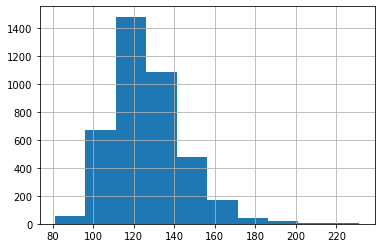

In [2]:
%matplotlib inline
startYear = 1999
endYear = 2015
totalYears = endYear - startYear

noRecentUSInmigration = imputedDataset.loc[~imputedDataset.timeInUS.isin([1,2,3])]
recentCrossSectionOfNonImmigrants = noRecentUSInmigration.loc[noRecentUSInmigration.year==endYear]
# the simulated cohort starts in 1999 and then ages people forward ...so, teh youngest age is 18 + the number of years advanced
recentCrossSectionOfNonImmigrants = recentCrossSectionOfNonImmigrants.loc[recentCrossSectionOfNonImmigrants.age > 18 +totalYears]
recentCrossSectionOfNonImmigrants = recentCrossSectionOfNonImmigrants.sample(n=len(recentCrossSectionOfNonImmigrants), weights=recentCrossSectionOfNonImmigrants.WTINT2YR, replace=True)
recentCrossSectionOfNonImmigrants.meanSBP.hist()

In [3]:
earlyEndYear = 2001
earlyTotalYears = earlyEndYear - startYear

earlyCrossSectionOfNonImmigrants = imputedDataset.loc[imputedDataset.year==earlyEndYear]
# here we just need to throw out the very young people for comparisons
earlyCrossSectionOfNonImmigrants = earlyCrossSectionOfNonImmigrants.loc[earlyCrossSectionOfNonImmigrants.age > 18 + earlyTotalYears]
earlyCrossSectionOfNonImmigrants = earlyCrossSectionOfNonImmigrants.sample(n=len(earlyCrossSectionOfNonImmigrants), weights=earlyCrossSectionOfNonImmigrants.WTINT2YR, replace=True)

print (earlyCrossSectionOfNonImmigrants.meanSBP.describe())

count    5306.000000
mean      123.303619
std        19.130008
min        76.666667
25%       110.666667
50%       120.000000
75%       132.000000
max       222.666667
Name: meanSBP, dtype: float64


# Run a simple simulation with the cohort models (default) starting in 1999 as a comparator

In [4]:
import os
os.chdir("/Users/burke/Documents/research/bpCog/microsim")
from microsim.population import NHANESDirectSamplePopulation

pop = NHANESDirectSamplePopulation(n=50000, year=1999)
pop.advance(totalYears)


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


processing year: 0
processing year: 1
processing year: 2
processing year: 3
processing year: 4
processing year: 5
processing year: 6
processing year: 7
processing year: 8
processing year: 9
processing year: 10
processing year: 11
processing year: 12
processing year: 13
processing year: 14
processing year: 15


### Compare SBPs between teh simluation and between NHANES

NHANES SBPS
count    4022.000000
mean      126.595309
std        17.942908
min        81.000000
25%       114.666667
50%       124.666667
75%       135.333333
max       231.333333
Name: meanSBP, dtype: float64
Simulation SBPs
: count    43473.000000
mean       123.093598
std         15.865662
min         73.723160
25%        112.179060
50%        121.059659
75%        131.248779
max        228.390962
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean       71.844936
std        11.019373
min        40.000000
25%        64.666667
50%        72.000000
75%        78.666667
max       116.666667
Name: meanDBP, dtype: float64
Simulation SBPs
: count    43473.000000
mean        78.412362
std          9.097356
min         46.998010
25%         72.347615
50%         78.076404
75%         84.316665
max        122.386421
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean        5.803580
std         1.000722
min         4.000000
25%         5.300000
50%         5.600000
75%         5.900000
max        16.500000
Name: a1c, dtype: float64
Simulation SBPs
: count    43473.000000
mean         5.447702
std          0.789373
min          3.909693
25%          5.036789
50%          5.319357
75%          5.632893
max         14.468413
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean       29.848018
std         6.797222
min        14.500000
25%        25.100000
50%        28.900000
75%        33.500000
max        67.300000
Name: bmi, dtype: float64
Simulation SBPs
: count    43473.000000
mean        28.455834
std          6.593033
min         13.407543
25%         23.868109
50%         27.304141
75%         31.678427
max         71.966395
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean      118.190453
std        37.101057
min        22.000000
25%        91.000000
50%       115.000000
75%       140.000000
max       320.000000
Name: ldl, dtype: float64
Simulation SBPs
: count    43473.000000
mean       120.099432
std         30.347621
min          2.475364
25%         99.653947
50%        117.884080
75%        138.120939
max        332.561369
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean       56.037792
std        20.309592
min         6.000000
25%        42.000000
50%        53.000000
75%        67.000000
max       226.000000
Name: hdl, dtype: float64
Simulation SBPs
: count    43473.000000
mean        50.785352
std         15.676293
min          7.440689
25%         39.624793
50%         48.330929
75%         59.338385
max        137.193254
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean      133.350572
std       109.077023
min        19.000000
25%        73.000000
50%       104.000000
75%       162.000000
max      1651.000000
Name: trig, dtype: float64
Simulation SBPs
: count    43473.000000
mean       143.397358
std         63.030793
min         20.573499
25%        100.656320
50%        130.416843
75%        172.106931
max        874.432863
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean      198.291895
std        43.179853
min        80.000000
25%       169.000000
50%       196.000000
75%       223.000000
max       545.000000
Name: tot_chol, dtype: float64
Simulation SBPs
: count    43473.000000
mean       199.021163
std         30.654143
min        106.238928
25%        177.413357
50%        196.193192
75%        217.487628
max        404.172557
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean      102.679214
std        15.912812
min        64.000000
25%        92.100000
50%       101.700000
75%       111.800000
max       169.600000
Name: waist, dtype: float64
Simulation SBPs
: count    43473.000000
mean        96.202464
std         15.817389
min         60.358700
25%         84.389640
50%         94.673356
75%        105.532926
max        175.428708
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


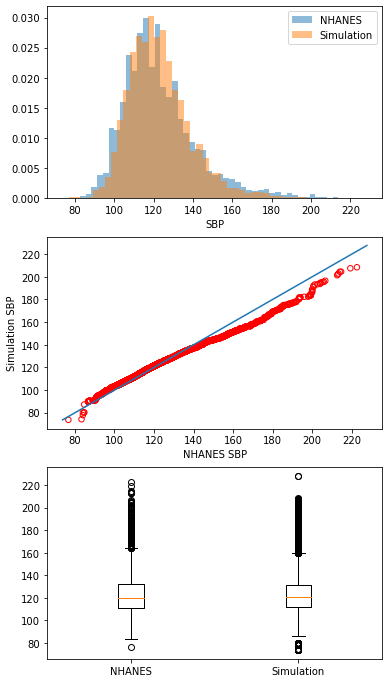

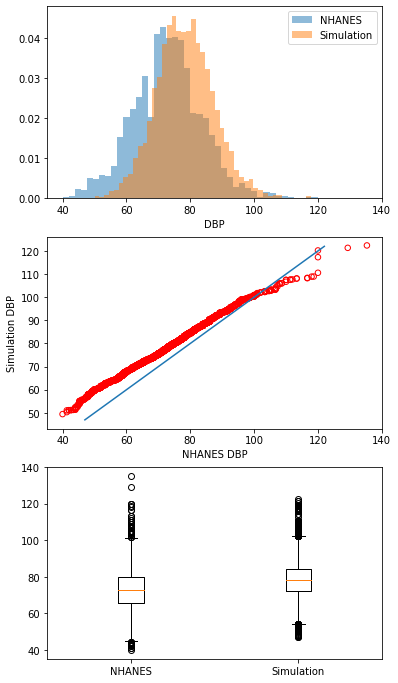

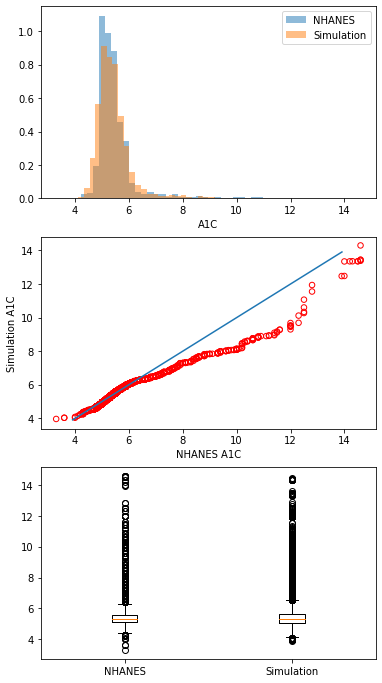

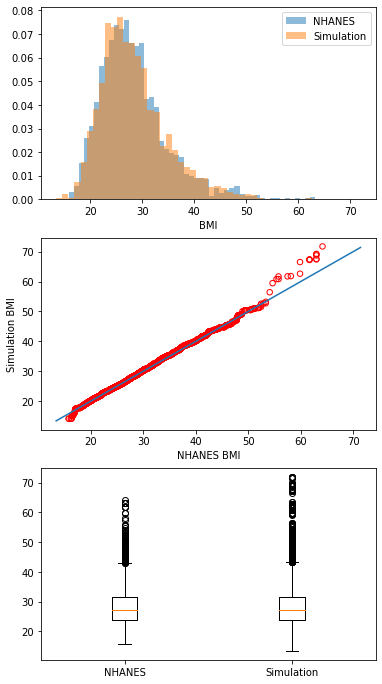

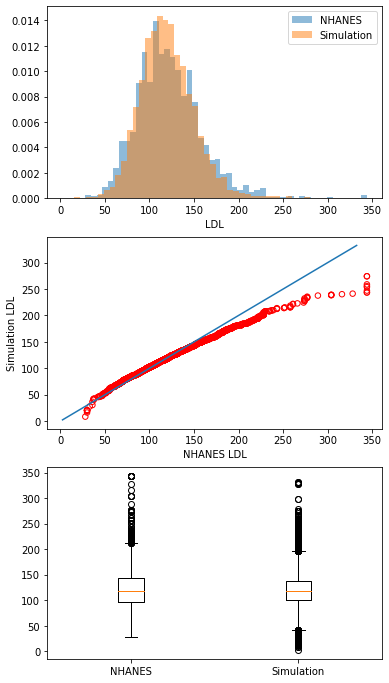

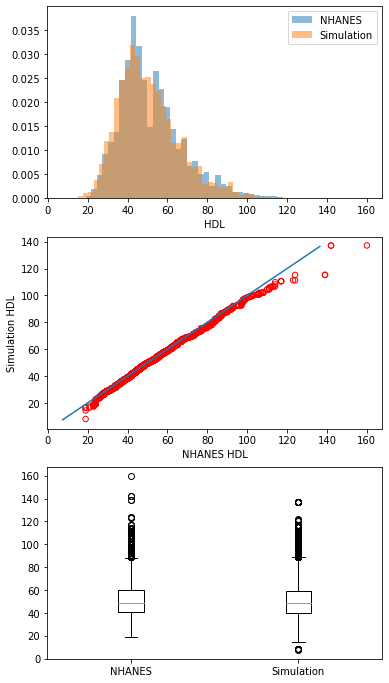

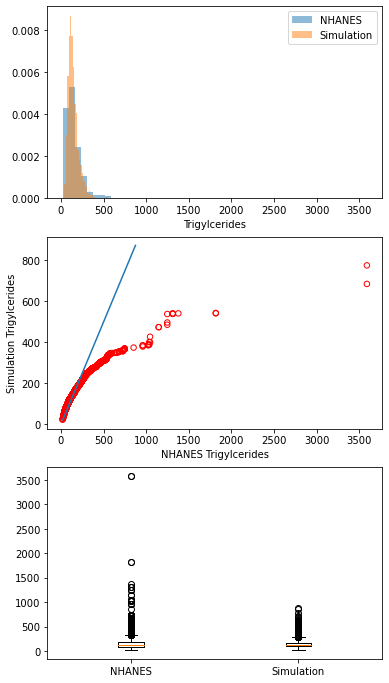

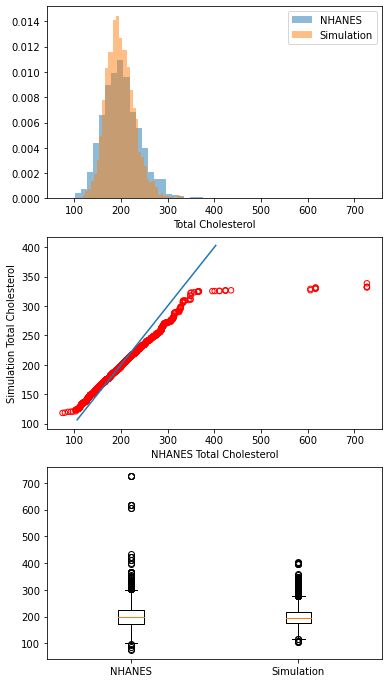

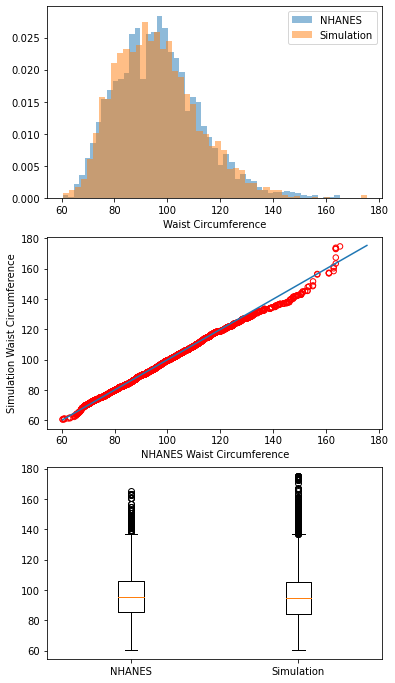

In [71]:
def plotComparisonFigure(attributeName, dfName, label):

    personAttributes = pd.Series([ getattr(person, attributeName)[-1] for person in pop._people if not person.diedBy2015])


    fig, (ax1, ax2, ax3) = plt.subplots(3)

    fig.set_size_inches(6, 12)
    ax1.set_xlabel(label)
    ax1.hist(earlyCrossSectionOfNonImmigrants[dfName], alpha=0.5, density=True, bins=50, label="NHANES")
    ax1.hist(personAttributes, alpha=0.5, density=True, bins=50, label="Simulation")
    ax1.legend()
    print ("NHANES SBPS\n" + str(recentCrossSectionOfNonImmigrants[dfName].describe()))
    print("Simulation SBPs\n: " + str(personAttributes.describe()))
    ax2.scatter(earlyCrossSectionOfNonImmigrants[dfName].sort_values(), 
         personAttributes.sample(n=len(earlyCrossSectionOfNonImmigrants)).sort_values(), s=30, facecolors='none', edgecolors='r')
    ax2.set_ylabel(f"Simulation {label}")
    ax2.set_xlabel(f"NHANES {label}")
    plotRange = np.arange(personAttributes.min(),personAttributes.max())
    ax2.plot(plotRange, plotRange)

    ax3.boxplot([earlyCrossSectionOfNonImmigrants[dfName], personAttributes], labels=['NHANES', 'Simulation'])
    ax3.set_xlabel

    os.chdir("/Users/burke/Documents/research/bpCog/designAndMethodsPaper/figures/")
    plt.savefig(label + '.png')
    return fig, ax1, ax2, ax3

figureDescriptions = [('_sbp', 'meanSBP', 'SBP'), ('_dbp', 'meanDBP', 'DBP'),('_a1c', 'a1c', 'A1C'),
                     ('_bmi', 'bmi', 'BMI'), ('_ldl', 'ldl', 'LDL'), ('_hdl', 'hdl', 'HDL'),
                     ('_trig', 'trig', 'Trigylcerides'), ('_totChol', 'tot_chol', 'Total Cholesterol'),
                     ('_waist', 'waist', 'Waist Circumference')]

figs = []
hists = []
scatters = []
boxes = []

def saveFig(ax):
    fig = plt.save


for desc in figureDescriptions:
    fig, hist, scatter, box = plotComparisonFigure(*desc)
    figs.append(fig)
    hists.append(hist)
    scatters.append(scatter)
    boxes.append(box)    
    saveFig(hist)
    saveFig(scatter)
    saveFig(box)

In [75]:
hists[0]

In [76]:
fig.axes[0]

In [63]:
earlyCrossSectionOfNonImmigrants.head()

,index,WTINT2YR,a1c,age,antiHypertensive,bmi,diedBy2015,gender,hdl,ldl,monthsToDeath,monthsToDeath2,otherLipidLowering,selfReportMI,selfReportMIAge,selfReportStroke,selfReportStrokeAge,statin,timeInUS,tot_chol,trig,ucod,waist,weight,year,anyPhysicalActivity,meanSBP,meanDBP,alcoholPerWeek,raceEthnicity,smokingStatus,education
33394,33394,25845.884333,5.3,73.0,0.0,22.47,1.000000e+00,1.0,57.0,73.0,111.0,110.0,0.0,0,NaN,0,NaN,0.0,NaN,166.0,89.0,3,85.5,69.2,2001,1,138.666667,64.666667,7.0,3,1,5
30268,30268,85963.804502,4.8,39.0,1.0,37.15,5.397605e-79,2.0,44.0,113.0,131.0,130.0,0.0,0,NaN,0,NaN,0.0,NaN,208.0,91.0,0,101.3,96.9,2001,1,125.333333,89.333333,0.0,3,0,5
33531,33531,74874.410185,5.5,33.0,0.0,26.89,5.397605e-79,2.0,44.0,104.0,115.0,115.0,0.0,0,NaN,0,NaN,0.0,NaN,167.0,106.0,0,88.5,69.8,2001,1,113.333333,70.000000,7.0,3,0,3
34330,34330,47803.159784,5.4,21.0,0.0,29.94,5.397605e-79,1.0,43.0,111.0,110.0,109.0,0.0,0,NaN,0,NaN,0.0,NaN,179.0,125.0,0,99.6,98.4,2001,1,108.666667,68.000000,84.0,3,0,4
29447,29447,35236.674324,5.4,45.0,1.0,27.53,5.397605e-79,1.0,42.0,136.0,110.0,110.0,0.0,0,NaN,0,NaN,0.0,NaN,219.0,140.0,0,102.5,84.4,2001,1,124.666667,68.666667,14.0,3,2,3


Summary — SBP pressure predictions afgter 11 years look quite good. Mean is very close to the NHANES mean, variance is slightly reduced and there is slight underprediction on trhe very high end, but its not awful.

In fact, I think its close enough that I wouldn't recalibrate. Instead, I think we can see how we do when we add treatmetn...and if it holds up ok, then I think we're done and won't need recalibration.

meanSBP


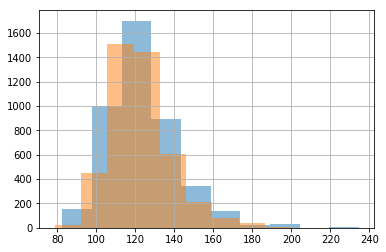

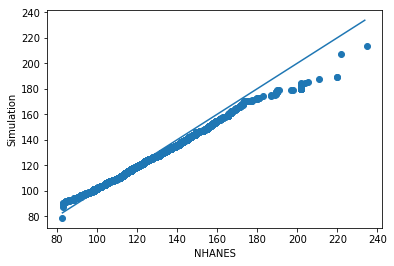

meanDBP


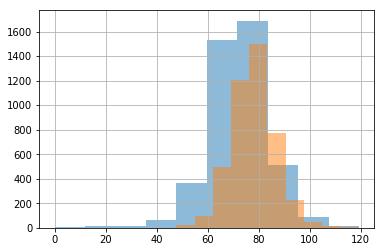

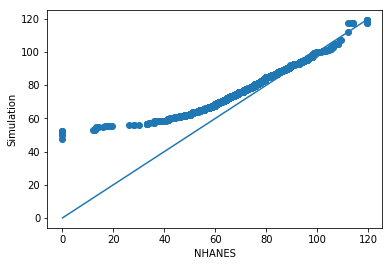

bmi


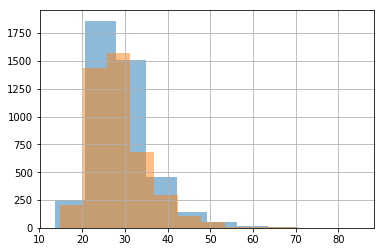

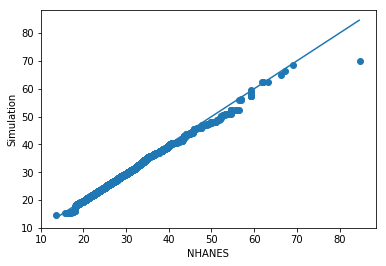

ldl


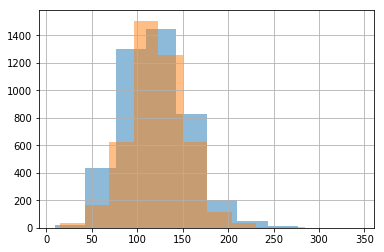

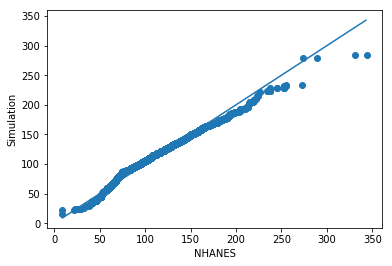

hdl


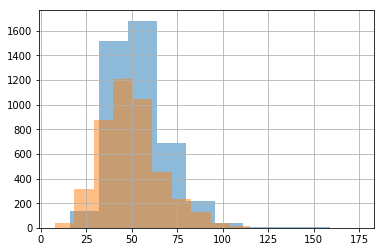

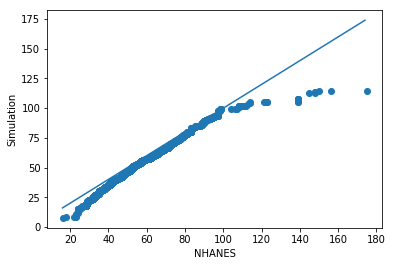

a1c


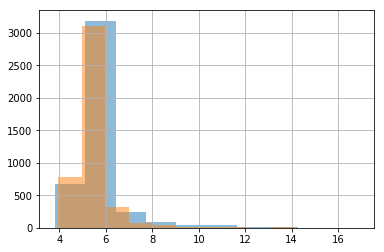

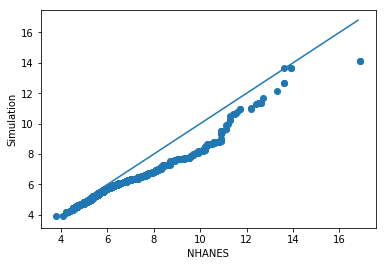

trig


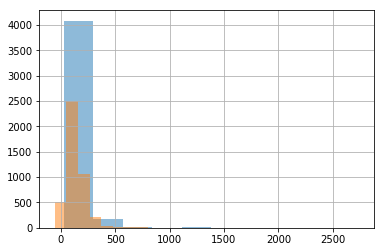

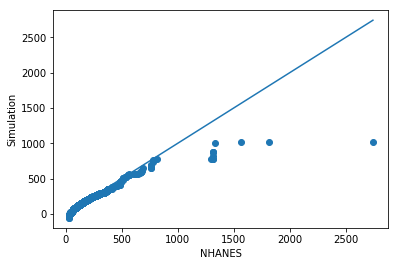

In [7]:
riskFactors = [("meanSBP", "sbp"), ("meanDBP", "dbp"), ("bmi", "bmi"), ("ldl", "ldl"), ("hdl", "hdl"), ("a1c", "a1c"), ("trig", "trig")]

def getRiskFactors(nhanesName, simName):
    nhanes = recentCrossSectionOfNonImmigrants[nhanesName]
    sim = [ getattr(person, "_" + simName)[-1] for person in pop._people if not person.diedBy2011]
    return (nhanes, pd.Series(sim))
    
for riskFactorTuple in riskFactors:
    print(riskFactorTuple[0])
    nhanes, sim = getRiskFactors(riskFactorTuple[0], riskFactorTuple[1])
    nhanes.hist(alpha=0.5)
    sim.hist(alpha=0.5)
    plt.show()
    
    plt.scatter(nhanes.sort_values(), 
     sim.sample(n=len(recentCrossSectionOfNonImmigrants)).sort_values())
    plt.plot(np.arange(nhanes.min(),nhanes.max()), np.arange(nhanes.min(), nhanes.max()))
    plt.xlabel("NHANES")
    plt.ylabel("Simulation")
    plt.show()
